# 第九章 非监督模式识别
---

## 二轮总结笔记

### 一、基于模型的方法（单峰子集分离）

#### 1. 思想

将样本投影到一维，在一维上估计概率密度，寻找单峰进行划分。

#### 2. 算法

1. 对**所有样本**进行主成分分析，选择第一主成分$\mathbf{u}_j$方向对样本进行投影。
2. 用**非参数方法**估计投影后的样本的概率密度函数，如直方图法。
3. 在波谷（概率密度极小值点）做垂直于$\mathbf{u}_j$的分类超平面，将样本划分为若干子集。如果没有波谷，则选择下一主成分进行投影。
4. 对每个子集重复上述步骤，直到得到预想的的聚类数量或者每个子集都是单峰分布。注意每次进行投影使用的主成分都是**所有样本**的主成分，包括子集的投影。

#### 3. 性质

1. 把方差最大的方向作为投影方向。
2. 不一定适用于所有情况。


### 二、混合模型的估计（非监督参数估计问题）

#### 1. 非监督最大似然估计

##### (1) 假设条件

假设除了几个参数外，已经完全知道了问题的概率结构，即

1. 类别数量已知，但是不知道样本来自哪个类。
2. 每类先验概率$P(\omega_j)$已知。
3. 每类概率密度函数形式$p(\mathbf{x}|\omega_j,\boldsymbol\theta_j)$已知。
4. 未知的只有$c$个参数向量$\boldsymbol\theta_j$。

##### (2) 似然函数

$$\begin{aligned}
p(\mathbf{x}|\boldsymbol\theta) &= \sum_{i=1}^cp(\mathbf{x}|\omega_j,\boldsymbol\theta_j)P(\omega_j)\\
l(\boldsymbol\theta) &= p(\mathscr{X}|\boldsymbol\theta)= \prod_{k=1}^Np(\mathbf{x}_k|\boldsymbol\theta) \\
H(\boldsymbol\theta) &= \ln[l(\boldsymbol\theta)] = \sum_{k=1}^N \ln p(\mathbf{x}_k|\boldsymbol\theta)
\end{aligned}$$

其中，$P(\omega_j)$称为**混合参数**，$p(\mathbf{x}|\omega_j,\boldsymbol\theta_j)$称为**分量密度**。

##### (3) 可识别性问题

1. 常见**连续**随机变量的分布密度函数都是**可识别**的。
2. **离散**随机变量的混合概率函数往往使**不可识别**的。

##### (4) 计算问题

1. 先验概率已知：

最大似然估计解$\hat{\boldsymbol\theta}$满足

$$
\nabla_{\boldsymbol\theta_i}H(\hat{\boldsymbol\theta}) = \sum_{k=1}^N P(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i)\nabla_{\boldsymbol\theta_i}\ln p(\mathbf{x}_k|\omega_i,\hat{\boldsymbol\theta}_i) = 0,\quad i=1,\cdots,c
$$

2. 先验概率未知：

最大似然估计解$\hat{\boldsymbol\theta}$和$\hat{P}(\omega_i)$满足

$$\begin{aligned}
&\sum_{k=1}^N \hat{P}(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i)\nabla_{\boldsymbol\theta_i}\ln p(\mathbf{x}_k|\omega_i,\hat{\boldsymbol\theta}_i) = 0,\\
&\hat{P}(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i) = \frac{p(\mathbf{x}_k|\omega_i,\hat{\boldsymbol\theta}_i)\hat{P}(\omega_i)}{\displaystyle \sum_{j=1}^cp(\mathbf{x}_k|\omega_i,\hat{\boldsymbol\theta}_i)\hat{P}(\omega_i)}, 
\end{aligned}\quad i=1,\cdots,c$$

3. 性质

求出封闭解很困难，通常使用迭代法求解。

#### 2. 正态分布情况下的非监督参数估计

##### (1) 只有均值向量$\boldsymbol\mu_i$未知

1. 解的方程：

$$\begin{aligned}
\hat{\boldsymbol\mu}_i &= \frac{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\mu}_i)\mathbf{x}_k}{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\mu}_i)} \\
P(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\mu}_i) &= \frac{p(\mathbf{x}_k|\omega_i,\hat{\boldsymbol\mu}_i)P(\omega_i)}{\displaystyle\sum_{j=1}^cp(\mathbf{x}_k|\omega_j,\hat{\boldsymbol\mu}_j)P(\omega_j)}
\end{aligned}$$

2. 算法：

+ 迭代公式：

$$
\hat{\boldsymbol\mu}_i(j+1) = \frac{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\mu}_i(j))\mathbf{x}_k}{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\mu}_i(j))}
$$

+ 缺点：一般梯度法的缺点：得到的可能是局部最优解，受$\hat{\boldsymbol\mu}_i(0)$初值影响。

3. 性质：$\boldsymbol\mu_i$的最大似然估计是样本加权平均。

##### (2) 均值向量$\boldsymbol\mu_i$、协方差矩阵$\boldsymbol\Sigma_i$、先验概率$P(\omega_i)$未知，但是类别数$c$已知

1. 解的方程：

$$\begin{aligned}
\hat{P}(\omega_i) &= \frac{1}{N}\sum_{k=1}^N\hat{P}(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i)\\
\hat{\boldsymbol\mu}_i &= \frac{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i)\mathbf{x}_k}{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i)} \\
\hat{\Sigma}_i &= \frac{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i)(\mathbf{x}_k-\hat{\boldsymbol\mu}_i)(\mathbf{x}_k-\hat{\boldsymbol\mu}_i)^\text{T}}{\displaystyle\sum_{k=1}^NP(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i)}\\
P(\omega_i|\mathbf{x}_k,\hat{\boldsymbol\theta}_i) &= \frac{p(\mathbf{x}_k|\omega_i,\hat{\boldsymbol\theta}_i)P(\omega_i)}{\displaystyle\sum_{j=1}^cp(\mathbf{x}_k|\omega_j,\hat{\boldsymbol\theta}_j)P(\omega_j)}
\end{aligned}$$

2. 算法：迭代法。
3. 性质： 所有样本都对估计值起某种作用，这些估计仍然是加权的频数比、样本均值和样本协方差矩阵。

##### (3) 均值向量$\boldsymbol\mu_i$、协方差矩阵$\boldsymbol\Sigma_i$、先验概率$P(\omega_i)$、类别数$c$全都未知

无法用最大似然估计求解。


### 三、动态聚类算法

#### 1. C均值（C-means）/k均值（k-means）/广义Llogd（GLA）算法

##### (1) 原理

最小平方划分：使误差平方和准则$J_\text{e}$最小

$$
J_\text{e} = \sum_{i=c}^c\sum_{\mathbf{y}\in\Gamma_i}||\mathbf{y}-\mathbf{m}_i||^2
$$

##### (2) 算法

1. 初始划分$c$个聚类，计算均值$\mathbf{m}_i$。
2. 选取一个样本$\mathbf{y}$，设$\mathbf{y}\in\Gamma_i$。
3. 计算误差平方和的增加量和减少量

$$\begin{aligned}
\rho_j &= \frac{N_j}{N_j+1}||\mathbf{y}-\mathbf{m}_j||^2,\quad j\neq i\\
\rho_i &= \frac{N_i}{N_i-1}||\mathbf{y}-\mathbf{m}_i||^2
\end{aligned}$$

4. 考察增加量$\rho_j$的最小值$\rho_k$，若$rho_k<\rho_i$，则把$\mathbf{y}$从$\Gamma_i$移动到$\Gamma_k$中。
5. 重新计算均值$\mathbf{m}_i$，另选样本继续迭代，直到全部样本在一轮迭代中均不移动，则收敛。

##### (3) 样本初始划分方法

1. 代表样本点的选择：

+ 凭经验选。
+ 将数据随机分成$c$类，计算每类重心，重心作为代表点。
+ 用密度法选择代表点，找密度最大的点作为代表点。
+ 按照样本天然顺序或随机排序后选择前$c$个点作为代表点。
+ 从$(c-1)$聚类划分问题的解中产生$c$聚类划分问题的代表点。

2. 初始划分分类：

+ 归入最近的代表点。
+ 归入最近的代表点同时更新代表点为该类的重心（均值）。
+ 距离阈值划分法，小于阈值划入，大于阈值划分新类。
+ 标准化后归类，$\displaystyle\frac{(c-1)[\text{SUM}(i)-\text{MI}]}{\text{MA}-\text{MI}} + 1$最接近的整数就是类别序号。

##### (4) 性质

1. 使局部搜索算法，不能保证收敛到全局最优解。算法的结果收到初始化分和样本调整顺序的影响。
2. 误差平方和随聚类数目$c$增加单调下降，在拐点处的聚类数量$c$为最优。

#### 2. ISODATA方法（Iterative Self-Organization Data Analysis Technique）

##### (1) 特点

1. 分裂：一类中样本**特征**最大的**方差**大于阈值，则进行分裂。
2. 合并：不同类**均值**之间的**距离**小于阈值，则进行合并。
3. 最终类别数可以不等于期望类别数。

#### 3. 基于样本与核的相似性度量的动态聚类算法

##### (1) 准则函数

$$
J_K = \sum_{j=1}^c\sum_{\mathbf{y}\in\Gamma_j}\Delta(\mathbf{y},K_j)
$$

##### (2) 算法

1. 初始化分为$c$类，初始化每类的初始核$K_j$。
2. 把每个样本移动到准则函数$J_K$最小的类中。
3. 修正核$K_j$，迭代直至收敛。

##### (3) 核与相似性度量

1. 正态核函数：

$$\begin{aligned}
K_j(\mathbf{y},V_j) &= \frac{1}{(2\pi)^{\frac{d}{2}}|\hat{\boldsymbol\Sigma}_j|^{\frac{1}{2}}}\exp\left\{-\frac{1}{2}(\mathbf{y}-\mathbf{m}_j)^\text{T}\hat{\boldsymbol\Sigma}{_j^{-1}}(\mathbf{y}-\mathbf{m}_j)\right\} \\
\Delta(\mathbf{y},K_j) &= \frac{1}{2}(\mathbf{y}-\mathbf{m}_j)^\text{T}\hat{\boldsymbol\Sigma}{_j^{-1}}(\mathbf{y}-\mathbf{m}_j)+\frac{1}{2}\log |\hat{\boldsymbol\Sigma}_j|
\end{aligned}$$

2. 主轴核函数：

$$\begin{aligned}
K_j(\mathbf{y},V_j) &= \boldsymbol{U}_j^\text{T}\mathbf{y}\\
\Delta(\mathbf{y},K_j) &= [(\mathbf{y}-\mathbf{m}_j)-\mathbf{U}_j\mathbf{U}_j^T(\mathbf{y}-\mathbf{m}_j)]^\text{T}[(\mathbf{y}-\mathbf{m}_j)-\mathbf{U}_j\mathbf{U}_j^T(\mathbf{y}-\mathbf{m}_j)]
\end{aligned}$$
$\Delta(\mathbf{y},K_j)$为样本与主轴之间欧氏距离的平方。

##### (4) 性质

C均值是基于样本与核的相似性度量的动态聚类算法的一个特例。


### 四、模糊聚类方法

#### 1. 模糊集

##### (1) 隶属度函数

$\mu_A(\mathbf{x})$表示一个对象$\mathbf{x}$隶属于集合$A$的程度，$\mu_A(\mathbf{x})=1$表示$\mathbf{x}$完全属于$A$，$\mu_A(\mathbf{x})=0$表示$\mathbf{x}$完全不属于$A$。

##### (2) 支持集和支持点

$\mu_A(\mathbf{x})>0$的对象的集合叫做模糊集$A$的支持集$S(A)$。支持集中的元素称作模糊集$A$的支持点，或模糊集$A$的元素。

#### 2. 模糊C均值算法（Fuzzy C-Means，FCM）

##### (1) 损失函数

$$
J_\text{f} = \sum_{j=1}^c\sum_{i=1}^n[\mu_j(\mathbf{x})]^b||\mathbf{x}_i-\mathbf{m}_j||^2 \\
\sum_{j=1}^c\mu_j(\mathbf{x}_i)=1
$$

##### (2) 算法

迭代以下公式直至收敛

$$\begin{aligned}
\mathbf{m}_i &= \frac{\displaystyle\sum_{i=1}^n[\mu_j(\mathbf{x}_i)]^b\mathbf{x}_i}{\displaystyle\sum_{i=1}^n[\mu_j(\mathbf{x}_i)]^b}\\
\mu_j(\mathbf{x}_i) &= \frac{1}{||\mathbf{x}_i-\mathbf{m}_j||^{\frac{1}{b-1}}\displaystyle \sum_{k=1}^c\frac{1}{||\mathbf{x}_i-\mathbf{m}_k||^{\frac{1}{b-1}}}}
\end{aligned}\quad i=1,\cdots,n,\quad j=1,\cdots,c$$

##### (3) $b$的选择

1. $b>1$。
2. 如果$b\rightarrow 1$，则FCM等同于C均值。
3. 如果$b = \infty$，则算法得到完全模糊的解。

#### 3. 改进的模糊C均值算法

##### (1) 损失函数

$$
J_\text{f} = \sum_{j=1}^c\sum_{i=1}^n[\mu_j(\mathbf{x})]^b||\mathbf{x}_i-\mathbf{m}_j||^2 \\
\sum_{j=1}^c\sum_{i=1}^n\mu_j(\mathbf{x}_i)=n
$$

##### (2) 算法

迭代以下公式直至收敛

$$\begin{aligned}
\mathbf{m}_i &= \frac{\displaystyle\sum_{i=1}^n[\mu_j(\mathbf{x}_i)]^b\mathbf{x}_i}{\displaystyle\sum_{i=1}^n[\mu_j(\mathbf{x}_i)]^b}\\
\mu_j(\mathbf{x}_i) &= \frac{n}{||\mathbf{x}_i-\mathbf{m}_j||^{\frac{1}{b-1}}\displaystyle \sum_{k=1}^c\sum_{l=1}^n\frac{1}{||\mathbf{x}_l-\mathbf{m}_k||^{\frac{1}{b-1}}}}
\end{aligned}\quad i=1,\cdots,n,\quad j=1,\cdots,c$$

##### (3) 性质

1. 得到的隶属度函数值可能大于$1$。
2. 改进后的FCM比普通FCM有更好的鲁棒性，有**野值**的情况下效果好。
3. 对预先确定的**聚类数目不敏感**。
4. 对聚类中心**初值敏感**。
5. 如果迭代过程中出现某个聚类中心距离某个样本非常近，可能会得到只包含这**一个样本**的聚类。

#### 4. C均值、普通FCM和改进的FCM对比

##### (1) 预先确定的类别数比实际多（不同类有重叠）时

C均值和普通FCM不会反应重叠，改进的FCM会反应重叠。改进的FCM能合理的给出比预先确定的数目少的聚类，前两个不能。

##### (2) 预先确定的类别数比实际少时

C均值和普通FCM会把不同的类混在一起，改进的FCM会正确给出聚类中心。


### 五、分级聚类方法（hierarchical clustering）

#### 1. 思想

自底向上。

#### 2. 算法

##### (1) 自底向上算法

1. 初始化：每个样本形成一个类。
2. 合并：计算两两类别之间的距离或相似性，合并最小的。迭代直至合并为两类。

##### (2) 距离或相似性度量

1. 样本之间的距离或相似性度量：**欧氏距离**或**相关系数**。
2. 两类之间的距离或相似性度量（类间的连接）：
+ 最近距离（single linkage或single-link）：$\displaystyle \Delta(\Gamma_i,\Gamma_j)=\min\limits_{\mathbf{y}\in\Gamma_i\\\tilde{\mathbf{y}}\in\Gamma_j}\delta(\mathbf{y},\tilde{\mathbf{y}})$
+ 最远距离（complete linkage或complete-link）：$\displaystyle \Delta(\Gamma_i,\Gamma_j)=\max\limits_{\mathbf{y}\in\Gamma_i\\\tilde{\mathbf{y}}\in\Gamma_j}\delta(\mathbf{y},\tilde{\mathbf{y}})$
+ 均值距离（average linkage或average-link）：$\displaystyle \Delta(\Gamma_i,\Gamma_j)=\delta(\mathbf{m}_i,\mathbf{m}_j)$

#### 3. 性质

1. 分级聚类是局部搜素算法，算法对噪声比较敏感，个别样本变动可能会对聚类结果影响很大，样本数量较多时，影响比较微弱。
2. 聚类树画法不唯一，可以对调位置。

#### 4. 双向聚类与双聚类

##### (1) 双向聚类（two-way clustering）

分别对数据的两种排列索引做聚类。

##### (2) 双向聚类（biclustering）

寻找一组特征和一组样本，使这些样本在找出的特征上呈现为很强的聚类。

---
## 一轮学习笔记（包含代码实现）

这一章介绍的是非监督学习中的聚类。主要分为两个思路：一个是根据概率模型进行聚类，另一个是根据数据设计算法进行聚类。

书中在介绍概率模型聚类用到了大篇幅的概率公式推导，可以说完全看不懂，我尝试了一个小时之后彻底放弃，只能赌一手考研不考。至于到底考不考，等我今年考完研就知道了。

下面是书上介绍的基于数据的算法。

### 一、C均值算法

C均值算法的思想是最小化误差平方和，即最小化$\displaystyle J_e = \sum_{i=1}^c\sum_{\mathbf{y}\in\Gamma_i}||\mathbf{y}-\mathbf{m}_i||^2$。

具体算法如下：

1. 初始化划分$c$个聚类，具体初始化划分书上给了好多方法，不过都是启发式的算法，具体怎么初始化划分都可以。
2. 遍历所有样本，如果当前样本所在的类的样本数量$N_i > 1$，则比较把这个样本移动到别的类造成的误差平方和变化，即比较：

$$\begin{align}
\rho_j &= \frac{N_j}{N_j + 1}||\mathbf{y}-\mathbf{m}_j||^2, \quad j\neq i \\
\rho_i &= \frac{N_i}{N_i - 1}||\mathbf{y}-\mathbf{m}_i||^2
\end{align}$$

其中$\mathbf{m}_i$是第$i$类的均值。

3. 考察$\rho_j$中的最小值$\rho_k$，如果$\rho_k<\rho_i$，则把当前样本从$\Gamma_i$类移动到$\Gamma_k$类中。移动后重新计算$\mathbf{m}_i$是第$i$。
4. 如果当前一轮遍历把所有样本都考察过了，并且没有移动任何样本，说明已经达到了局部的最小误差平方和，认为收敛。

下面实现的代码中，我采用了寻找代表点的方法(2)和初始化分类的方法(1)。其实这些方法实际效果区别不大，用简单的就可以了。

实现如下：

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [47]:
class CMeans:
    """
    实现C均值算法的类
    """
    def __init__(self, c: int):
        """
        构造函数
        :param c: 指定的聚类数量
        """
        self._c: int = c
        # self._c表示聚类数

        self._d: int = 0
        # self._d表示样本维数

        self._N: int = 0
        # self._N表示样本总数

        self._X: np.ndarray = np.zeros(0)
        # self._X存储所有样本

        self._clusters: list[set[int]] = []
        # self._clusters[i] = {1, 3} 表示第i个聚类中包含1号样本和2号样本

        self.m: list[np.ndarray] = [np.zeros(0)] * c
        # self._m[i]表示第i个聚类的均值

        self.costs: list[float] = []
        # self.costs记录每次迭代后的误差平方和

    def _update_mean(self):
        """
        更新每一类的均值
        """
        for i in range(self._c):
            cluster_sum = np.zeros(self._d)
            for j in self._clusters[i]:
                cluster_sum += self._X[j]
            self.m[i] = cluster_sum / len(self._clusters[i])

    def initialize(self, _X: np.ndarray):
        """
        初始化聚类
        :param _X: 样本矩阵，每一行是一个样本（N * d）
        """
        if _X.shape[0] <= self._c:
            raise Exception("样本数量必须比分类数量大！")

        self._X = _X.copy()
        self._N = _X.shape[0]
        self._d = _X.shape[1]

        np.random.shuffle(_X)
        for i in range(self._c):
            self._clusters.append({i})
        self._update_mean()

        for i in range(self._c, _X.shape[0]):
            min_distance = 999999
            min_index = 0
            for j in range(self._c):
                distance = np.sum((_X[i] - self.m[j]) ** 2)
                if min_distance > distance:
                    min_distance = distance
                    min_index = j
            self._clusters[min_index].add(i)
            self._update_mean()

    def _compute_cost(self) -> float:
        """
        计算误差平方和
        :return: 误差平方和
        """
        ret = 0
        for i in range(self._c):
            for j in self._clusters[i]:
                ret += np.sum((self._X[j] - self.m[i]) ** 2)
        return ret

    def cluster(self):
        """
        开始运行迭代聚类算法
        """
        clusters_order = np.random.permutation(self._c)
        # 随机生成遍历的顺序

        iters = 0
        confirmed_samples = 0
        while confirmed_samples < self._N:
            flag = False
            for c in clusters_order:
                if flag:
                    break
                cluster = list(self._clusters[c])
                N_i = len(self._clusters[c])
                samples_order = np.random.permutation(N_i)
                # 随机生成遍历的顺序
                for i in samples_order:
                    if flag:
                        break
                    rho_i = np.sum(N_i / (N_i - 1) * (self._X[cluster[i]] - self.m[c]) ** 2)
                    min_value_of_rho_j = 999999
                    min_cluster_of_rho_j = 0
                    for j in range(self._c):
                        if c == j:
                            continue
                        N_j = len(self._clusters[j])
                        rho_j = np.sum(N_j / (N_j + 1) * (self._X[cluster[i]] - self.m[j]) ** 2)
                        if min_value_of_rho_j > rho_j:
                            min_value_of_rho_j = rho_j
                            min_cluster_of_rho_j = j
                    iters += 1
                    if min_value_of_rho_j < rho_i:
                        self._clusters[c].remove(cluster[i])
                        self._clusters[min_cluster_of_rho_j].add(cluster[i])
                        self._update_mean()
                        self.costs.append(self._compute_cost())
                        confirmed_samples = 0
                        flag = True
                        break
                    confirmed_samples += 1
                    if iters >= 1000000:
                        raise Exception("迭代了100000次还不收敛，数据可能有问题")

    def result(self) -> np.ndarray:
        """
        获取聚类结果
        :return: 聚类结果向量
        """
        ret = np.zeros(self._N, dtype=int)
        for i, cluster in enumerate(self._clusters):
            for j in cluster:
                ret[j] = i
        return ret

接下来用水仙花的数据来测试一下聚类效果。

因为C均值算法考虑的是样本误差平方和，所以需要将各维度大小进行统一，防止某一个维度的影响过大。所以下面用`StandardScaler`对样本进行预处理。

In [3]:
iris = load_iris()
X = iris.data
y = iris.target
X = StandardScaler().fit_transform(X)

In [4]:
cmeans = CMeans(3)
cmeans.initialize(X)
cmeans.cluster()
y_clustered = cmeans.result()
print("原始数据类别为：")
print(y)
print("聚类获得的类别为：")
print(y_clustered)

原始数据类别为：
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
聚类获得的类别为：
[2 1 2 2 2 0 2 2 0 2 1 0 1 1 1 1 0 2 0 0 0 0 2 0 2 2 0 1 0 0 0 2 1 0 2 2 1
 0 2 1 0 0 1 1 2 0 2 1 0 2 2 2 0 0 2 1 0 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 0
 2 1 2 0 0 1 2 1 1 0 1 0 0 0 0 2 1 1 2 0 1 2 1 2 0 2 2 1 0 1 0 0 2 1 0 2 2
 1 2 2 2 0 2 2 0 1 0 0 0 1 0 1 2 1 2 2 1 2 1 0 2 1 2 2 2 2 2 1 0 2 0 1 0 2
 1 0]


可以看到聚类获得类别和原始类别非常不同，这是非常正常的现象。

接下来可视化的观察一下随着迭代，误差平方和的变化。

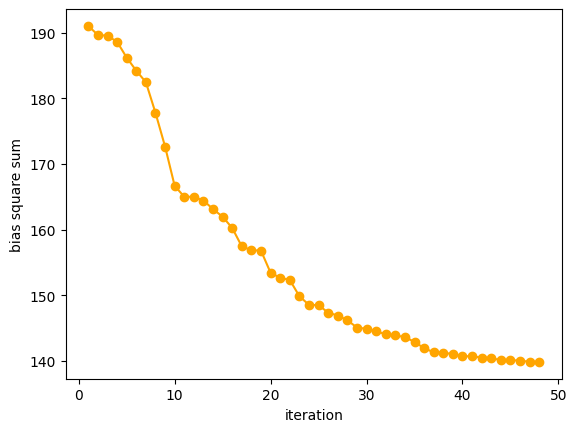

In [5]:
costs = cmeans.costs
iters = np.arange(1, len(costs) + 1)
plt.plot(iters, costs, color='orange', marker='o')
plt.xlabel("iteration")
plt.ylabel("bias square sum")
plt.show()

从图像可以看出每次迭代误差平方和都在下降。

### 二、ISODATA方法

ISODATA方法能一定程度上自动优化聚类的数量，是C均值的改进版，比C均值要灵活一些。

这个算法的问题在于参数非常多，而且都是需要按照经验给出的。书上也没给出实际应用中可行的参数大小，实现这个算法需要大量时间来试错调参，因此这个算法我就不实现了。

### 三、基于样本与核的相似性度量的动态聚类算法

这个算法是C均值算法的衍生，定义了两个函数：类核函数和距离函数，实现算法就是通过类和函数计算出每个类的核心，再通过距离函数计算每个样本到每个类核心的距离，把所有样本都放到距离最小的类，然后更新每个类的核心。反复这样迭代直到收敛。

C均值算法实际上就是这个方法的一个特例，C均值算法的类核函数是类均值，距离函数是欧氏距离的平方。

这个方法要解决的问题是样本在各个维度上的方差不统一，也就是各个维度度量大小不统一，但是其实我们在前面实现C均值算法时通过归一化处理已经把各个维度度量统一了，所以这个算法其实意义不大，这个算法也不实现了。

### 四、模糊C均值算法

模糊C均值算法用$\displaystyle J_e = \sum_{j=1}^c\sum_{i=1}^n[\mu_j(\mathbf{x}_i)]^b||\mathbf{x}_i-\mathbf{m}_j||^2$替代C均值算法中的误差平方和函数，其中$b$通常取$2$，$\mu_j(\mathbf{x})$是$\mathbf{x}$对$j$类的隶属度。

下面直接用改进的模糊C均值算法的约束条件：$\displaystyle\sum_{j=1}^c\sum_{i=1}^n\mu_j(\mathbf{x}_i)=n$。

这个条件下推导出的算法如下：

1. 获得初始的聚类中心，计算方法可以和C均值初始化方式一样，也可以用C均值计算的均值结果。
2. 用下面的公式计算每个样本的隶属度函数：

$$
\mu_j(\mathbf{x}_i) = \frac{\displaystyle n\left(\frac{1}{||\mathbf{x}_i-\mathbf{m}_j||^2}\right)^{\frac{1}{b-1}}}{\displaystyle\sum_{k=1}^c\sum_{l=1}^n\left(\frac{1}{||\mathbf{x}_l-\mathbf{m}_k||^2}\right)^{\frac{1}{b-1}}},\quad i=1,2,\cdots,n,\quad j=1,2,\cdots,c
$$

3. 用下面的公式更新各类聚类中心：

$$
\mathbf{m}_j = \frac{\displaystyle\sum_{i=1}^n[\mu_j(\mathbf{x}_i)]^b\mathbf{x}_i}{\displaystyle\sum_{i=1}^n[\mu_j(\mathbf{x})_i]^b},\quad j=1,2,\cdots,c
$$

反复迭代2、3步直到收敛。

实现代码如下：

In [70]:
class FuzzyCMeans:
    """
    这个类用于实现FCM算法
    """
    def __init__(self, c: int, b: int):
        """
        构造函数
        :param c: 要聚类的数量
        :param b: 公式中的b
        """
        self._c: int = c
        # self._c是聚类的数量

        self._b: int = b
        # self._b记录公式中的b

        self._X: np.ndarray = np.zeros(0)
        # self._X存储样本矩阵

        self._N: int = 0
        # self._N存储样本数量

        self._d: int = 0
        # self._d存储样本的维度

        self.m: np.ndarray = np.zeros(0)
        # self._m存储各类的聚类中心

        self.mu: np.ndarray = np.zeros(0)
        # self._mu存储各个样本的隶属度

        self.costs: list[float] = []
        # self.cost记录损失函数的值

    def initialize(self, _X: np.ndarray):
        self._X = _X.copy()
        self._N = _X.shape[0]
        self._d = _X.shape[1]
        self.m = np.zeros((self._c, self._d))
        self.mu = np.zeros((self._N, self._c))
        # 用C均值算法确定初始值，用来加速收敛
        cmeans = CMeans(self._c)
        cmeans.initialize(self._X)
        cmeans.cluster()
        for i in range(self._c):
            self.m[i] = cmeans.m[i]

    def _compute_cost(self) -> float:
        """
        计算损失函数
        :return: 损失函数的值
        """
        ret = 0
        for i in range(self._N):
            for j in range(self._c):
                ret += self.mu[i][j] ** self._b * np.sum((self._X[i] - self.m[j]) ** 2)
        return ret

    def _update_mu(self):
        """
        更新隶属度mu
        """
        inf = 999999
        for i in range(self._N):
            for j in range(self._c):
                _sum = 0
                for l in range(self._N):
                    for k in range(self._c):
                        square_bias = np.sum((self._X[l] - self.m[k]) ** 2)
                        if square_bias != 0:
                            _sum += (1 / square_bias) ** (1 / (self._b - 1))
                        else:
                            _sum += inf
                square_bias = np.sum((self._X[i] - self.m[j]) ** 2)
                if square_bias != 0:
                    self.mu[i][j] = self._N * ((1 / square_bias) ** (1 / (self._b - 1))) / _sum
                else:
                    self.mu[i][j] = self._N * inf / _sum

    def _update_m(self):
        """
        更新各类聚类中心m
        """
        for j in range(self._c):
            self.m[j] = np.sum(((self.mu[:, j].reshape(self._N, 1) ** self._b) * self._X), 0) / np.sum(self.mu[:, j] ** self._b)

    def cluster(self, _iters: int):
        for _iter in range(_iters):
            self._update_mu()
            self._update_m()
            _cost = self._compute_cost()
            self.costs.append(_cost)

从书中第203页的图片可以发现，改进的模糊C均值算法的优势在于就算实际的类别数量和给定的类别数量不符，算法也能得到较好的结果，我们在下面测试一下。

首先生成数据，显然生成的数据实际上有四个聚类。

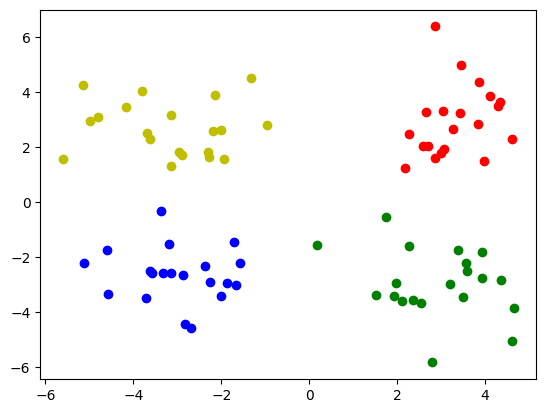

In [52]:
X = np.r_[
    np.random.randn(20, 2) + [-3.0, -3.0],
    np.random.randn(20, 2) + [3.0, 3.0],
    np.random.randn(20, 2) + [-3.0, 3.0],
    np.random.randn(60, 2) + [3.0, -3.0],
]
y = 20 * [0] + 20 * [1] + 20 * [2] + 20 * [3]

for i in range(80):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], c='b')
    elif y[i] == 1:
        plt.scatter(X[i][0], X[i][1], c='r')
    elif y[i] == 2:
        plt.scatter(X[i][0], X[i][1], c='y')
    else:
        plt.scatter(X[i][0], X[i][1], c='g')

plt.show()

In [72]:
fcm = FuzzyCMeans(3, 2)
fcm.initialize(X)
fcm.cluster(10)

运行上面的代码我们可以发现这个算法极其的慢，分析一下每次迭代的时间复杂度高达$\Theta(n^2c^2d)$，虽然我们只有80个样本，而且只迭代了十次，但是上面的算法还是跑了好几秒。接下来我们看一下损失函数的变化曲线。

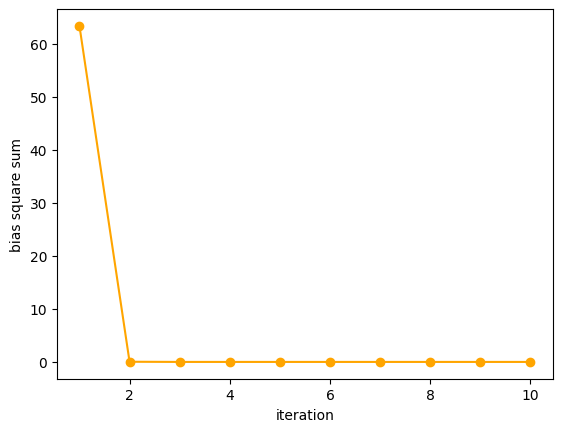

In [73]:
costs = fcm.costs
iters = np.arange(1, len(costs) + 1)
plt.plot(iters, costs, color='orange', marker='o')
plt.xlabel("iteration")
plt.ylabel("bias square sum")
plt.show()

很明显其实两次迭代就收敛了，说明算法收敛还是很快的。接下来看一下聚类的中心验证一下书上说的性质。

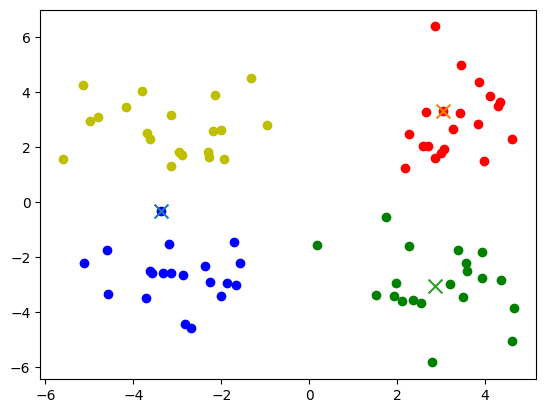

In [74]:
for i in range(80):
    if y[i] == 0:
        plt.scatter(X[i][0], X[i][1], c='b')
    elif y[i] == 1:
        plt.scatter(X[i][0], X[i][1], c='r')
    elif y[i] == 2:
        plt.scatter(X[i][0], X[i][1], c='y')
    else:
        plt.scatter(X[i][0], X[i][1], c='g')

for _m in fcm.m:
    plt.scatter(_m[0], _m[1], marker='x', s = 100)

plt.show()

图像中的叉表示一个聚类中心，可以发现其实这个算法并没有正确给出三个中心，而是和C均值一样把两个类混在一起了。

显然书上202和203页写的结论在这个例子上不成立，我猜测原因是FCM算法的结果受初始中心值影响极大，因为初始的中心设为了普通C均值算法的中心（可以去看代码中的`initialize`函数），最终导致了这样的结果。如果把初始的中心设置为正确的中心，估计结果就会符合预期。但是这也从侧面说明了这个算法的弊端，如果我们对数据的内在规律不了解，随机生成初始的中心，算法结果可能会很差。

### 五、分级聚类方法

这个方法的思想很简单，书上也只是简单的介绍了一下思想，就是通过自底向上的思想逐级合并子类为父类。分级聚类得到结果后还需要人为的划分类别，还有好多细节和指标要考虑，我也就不实现了。

### 六、自组织映射神经网络（SOM网络）

SOM网络是最典型的竞争型神经网络，思想是：轮流通过每个样本训练网络，每个样本会找到一个最相似的神经元作为获胜节点，在这个获胜节点的某个邻域更新神经元的权值。反复迭代直到收敛，这时每个样本都只有一个获胜节点，称为样本的像。

这个算法在书上介绍得很清楚，但是有两个实现算法的关键问题书上没有提及，即更新步长$\alpha(t)$和邻域$N_c(t)$如何计算。

更新步长在实现时暂且可以用固定值来处理，但是邻域是逐渐缩小的，并且到迭代的终点会缩小成只包含一个获胜节点。邻域如何缩小书上并没有介绍，这是实现SOM的最大问题。我在网上查阅资料的时候发现SOM的资料远远少于其他算法，并且也没找到太详细的实现邻域缩小算法的细节，这里先不实现了，有时间的话回来补上这个坑。